# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [2]:
dir = 'img/'

In [3]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
img = cv2.imread('img/blue-flowers.jpg', 1)
img_copy = img.copy()

In [4]:
def imshow(img):
    plt.figure(figsize = (20,15));
    plt.imshow(img[:,:,::-1]);

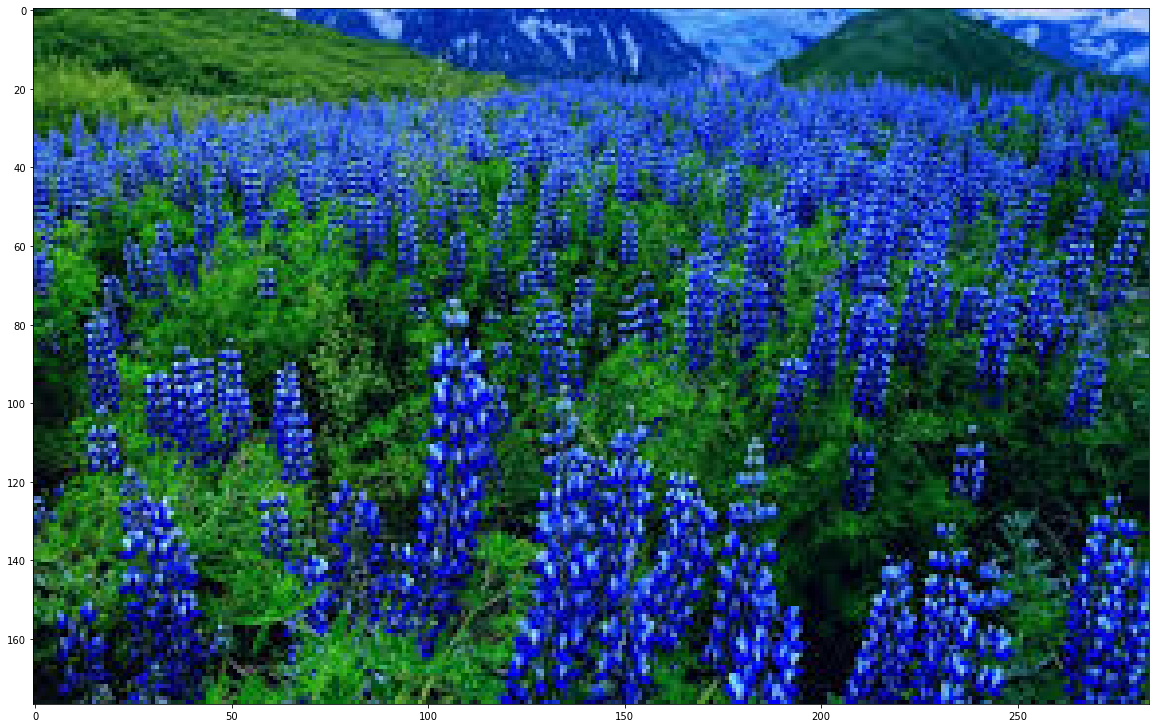

In [5]:
imshow(img)

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [6]:
# Load a color image and split in is different B, G and R channels
hsv = cv2.imread('img/hsv.png')
#hsv_img = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV)
B, G, R = cv2.split(hsv)

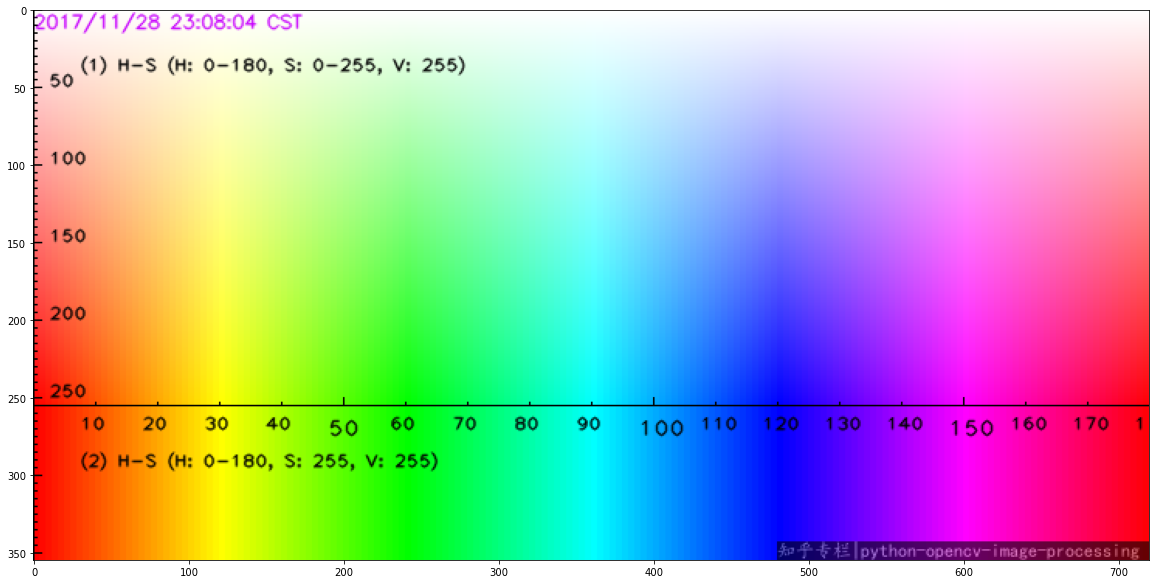

In [7]:
imshow(hsv)

[Hint](# "cv2.split") 

In [8]:
# Show each channel channel on screen
B

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0, 254, 254, ..., 254, 254, 254],
       [  0, 253, 253, ..., 253, 253, 253],
       ...,
       [  0,   0,   0, ...,   3,   3,   3],
       [  0,   0,   0, ...,   3,   3,   3],
       [  0,   0,   0, ...,   3,   3,   3]], dtype=uint8)

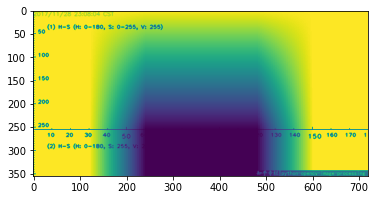

In [9]:
plt.imshow(R)

In [10]:
G

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0, 254, 254, ..., 254, 254, 254],
       [  0, 253, 253, ..., 253, 253, 253],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

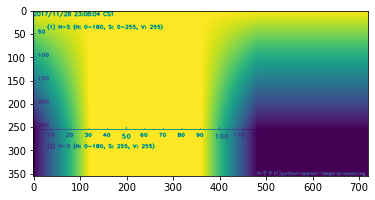

In [11]:
plt.imshow(G)

In [12]:
B

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0, 254, 254, ..., 254, 254, 254],
       [  0, 253, 253, ..., 253, 253, 253],
       ...,
       [  0,   0,   0, ...,   3,   3,   3],
       [  0,   0,   0, ...,   3,   3,   3],
       [  0,   0,   0, ...,   3,   3,   3]], dtype=uint8)

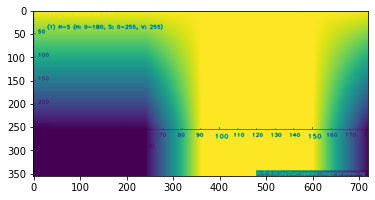

In [13]:
plt.imshow(B)

#### Merging the color channels

In [14]:
# Modify a channel and then merge them all again
R = R + 30
merged = cv2.merge([B,G,R])

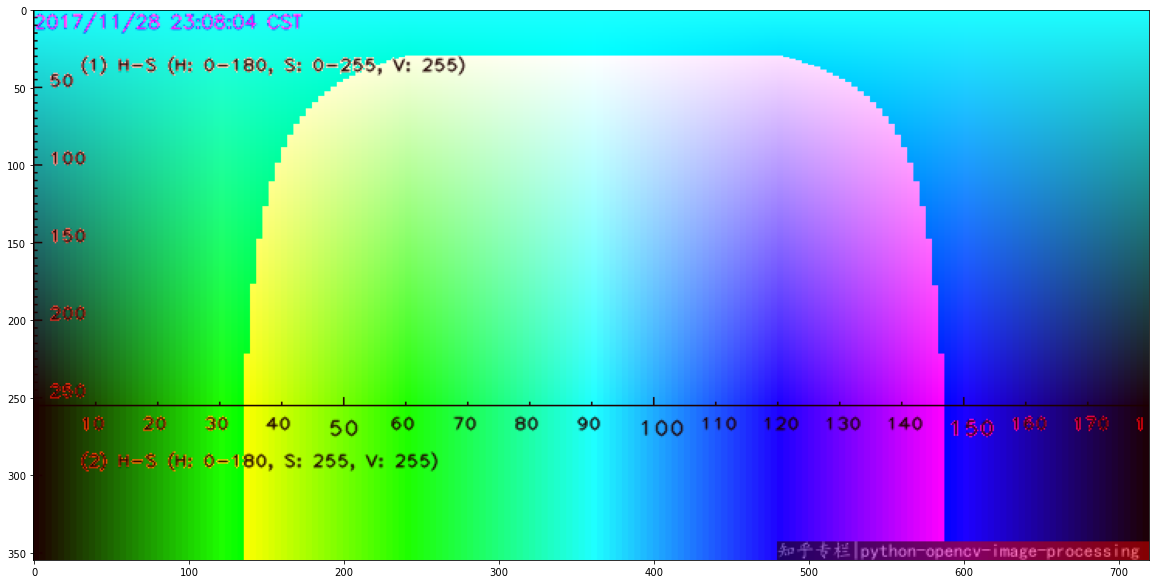

In [15]:
imshow(merged)

[Hint](# "cv2.merge") 

In [16]:
# Create a black canvas with the same size as the image you loaded
bcanv = np.zeros(img.shape[:2], dtype="uint8")

In [17]:
imshow(bcanv)

IndexError: too many indices for array

<Figure size 1440x1080 with 0 Axes>

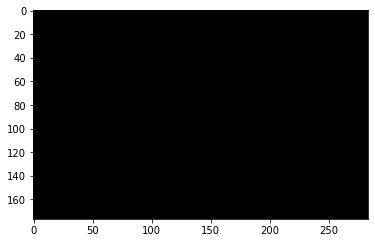

In [39]:
plt.imshow(bcanv, cmap = 'gray')

In [19]:
B, G, R = cv2.split(img)

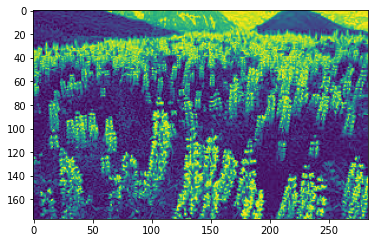

In [20]:
plt.imshow(B)

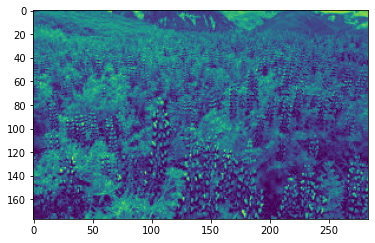

In [21]:
plt.imshow(G)

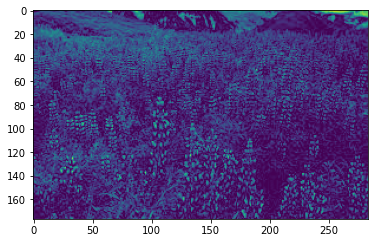

In [22]:
plt.imshow(R)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [23]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
RBB = cv2.merge((R,bcanv,bcanv))

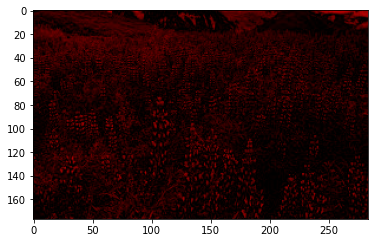

In [30]:
plt.imshow(RBB)

In [25]:
BGB = cv2.merge((bcanv, G, bcanv))

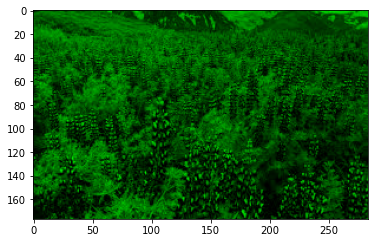

In [31]:
plt.imshow(BGB)

In [27]:
BBB = cv2.merge((bcanv, bcanv, B))

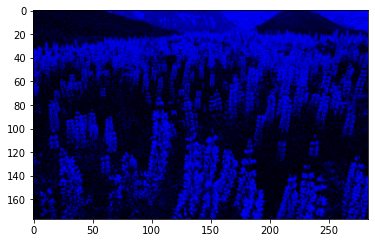

In [32]:
plt.imshow(BBB)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

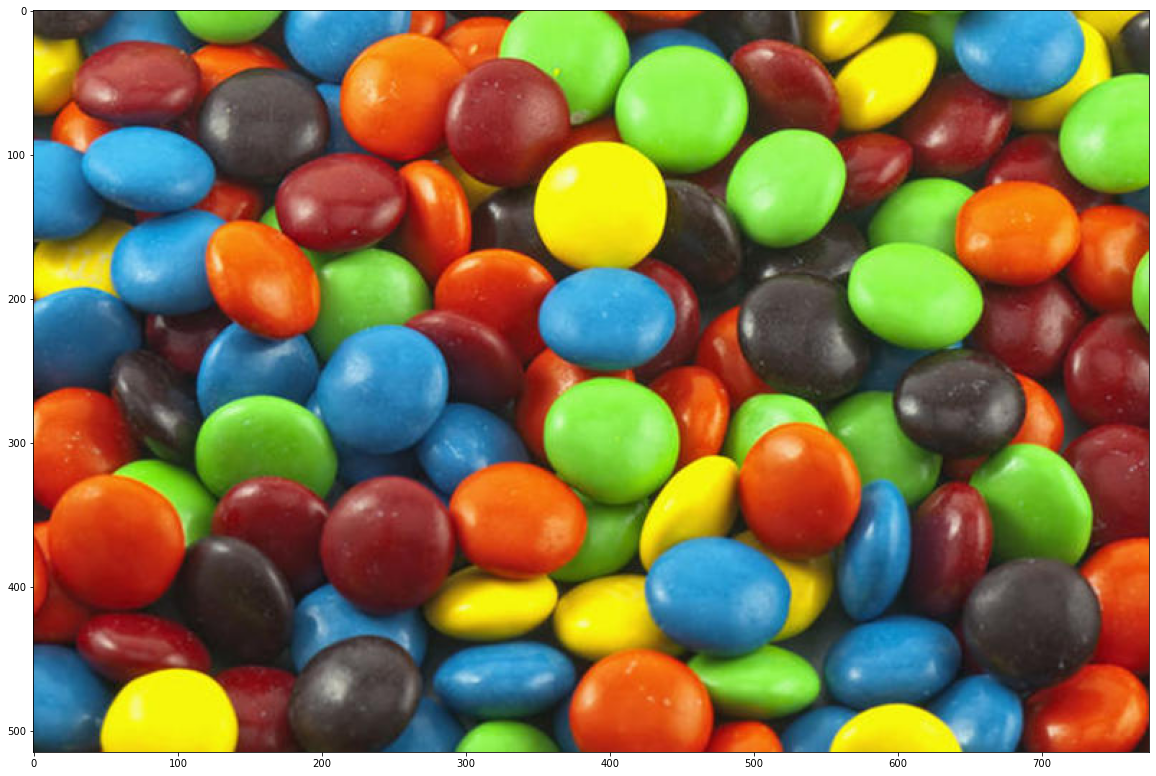

In [93]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [94]:
# Split the H,S and V channels 
HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(HSV)

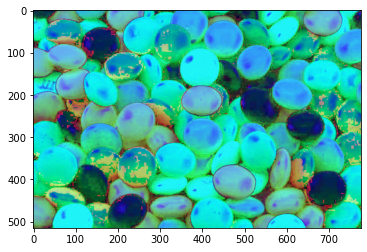

In [95]:
plt.imshow(HSV)

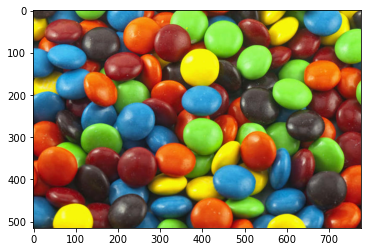

In [97]:
plt.imshow(cv2.cvtColor(HSV,cv2.COLOR_HSV2RGB))

[Hint](# "cv2.cvtColor") 

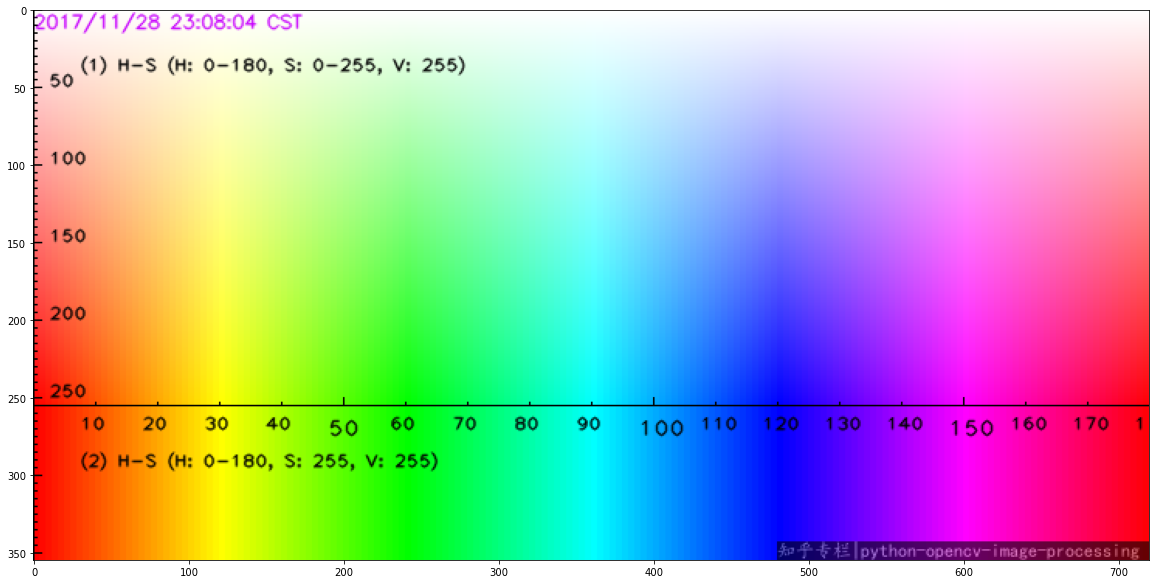

In [98]:
imshow(hsv)

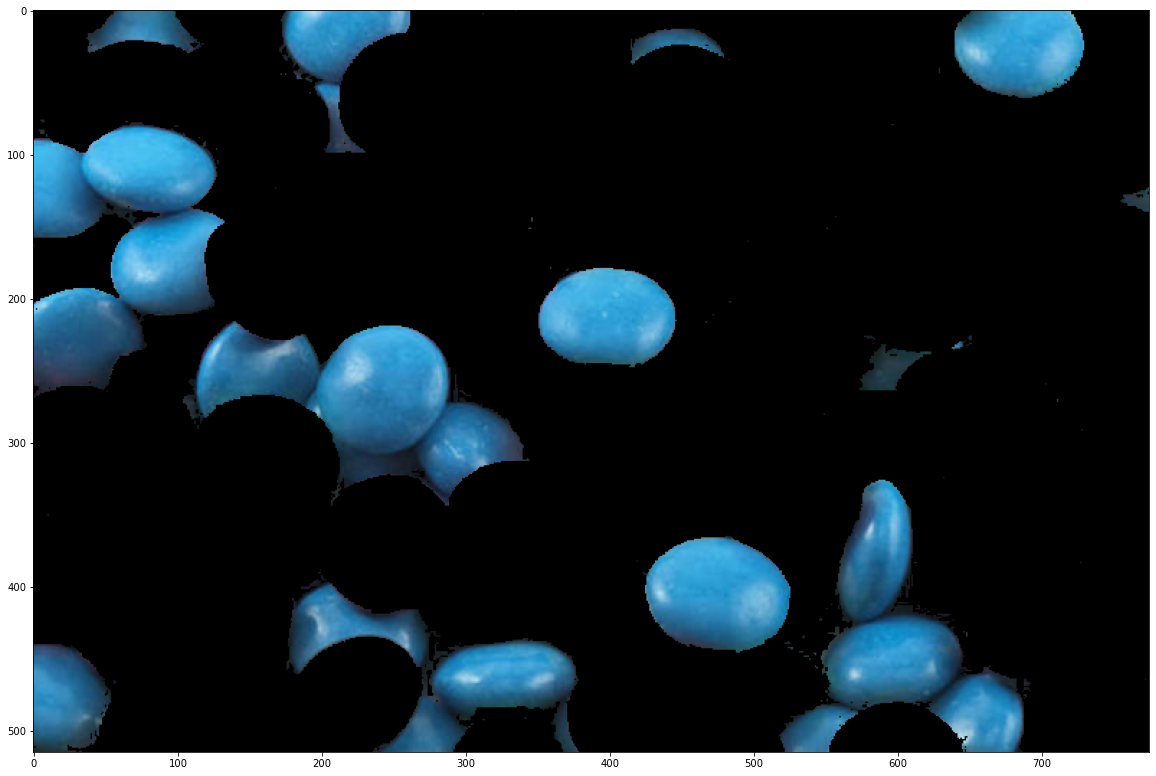

In [99]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image

lower_range = (90, 50, 20)
upper_range = (150, 255, 255)

mask = cv2.inRange(HSV, lower_range, upper_range)

masked_skittles = img.copy()

masked_skittles[mask==0] = [0,0,0]

imshow(masked_skittles)

[Hint](# "cv2.inRange") 

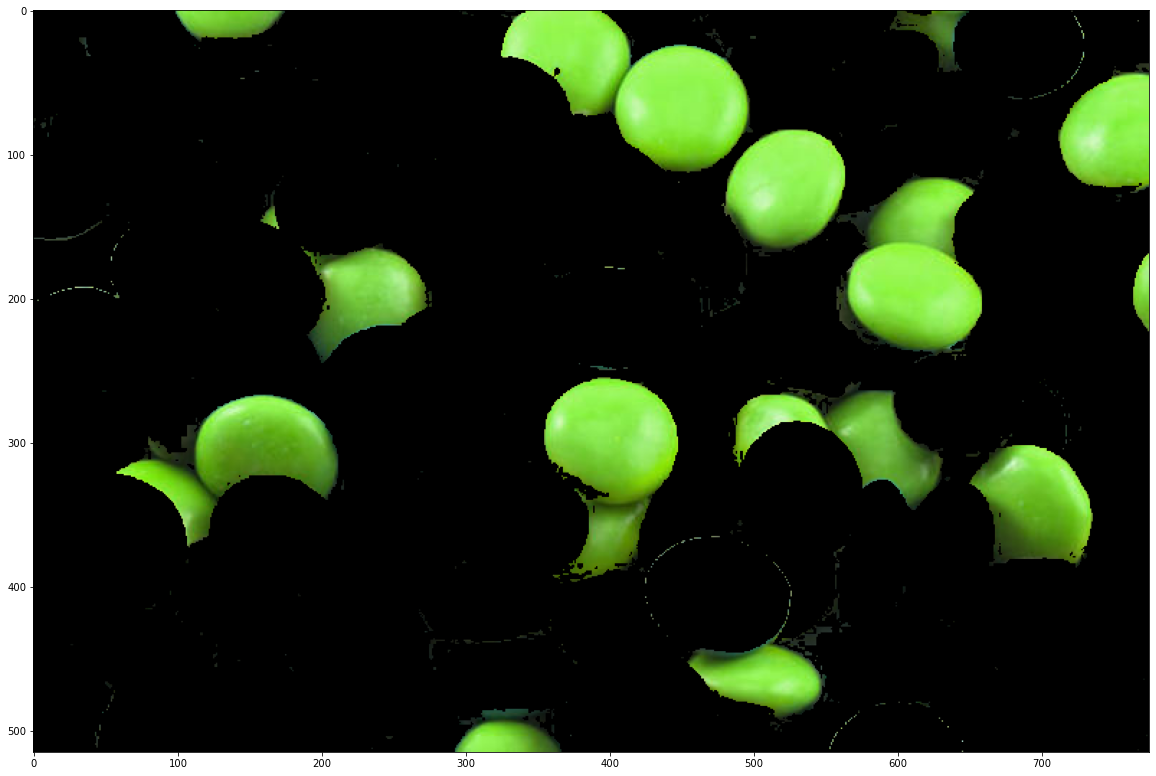

In [100]:
# Repeat the same but now with the greens
lower_range = (40, 50, 20)
upper_range = (80, 255, 255)

mask = cv2.inRange(HSV, lower_range, upper_range)

masked_skittles = img.copy()

masked_skittles[mask==0] = [0,0,0]

imshow(masked_skittles)

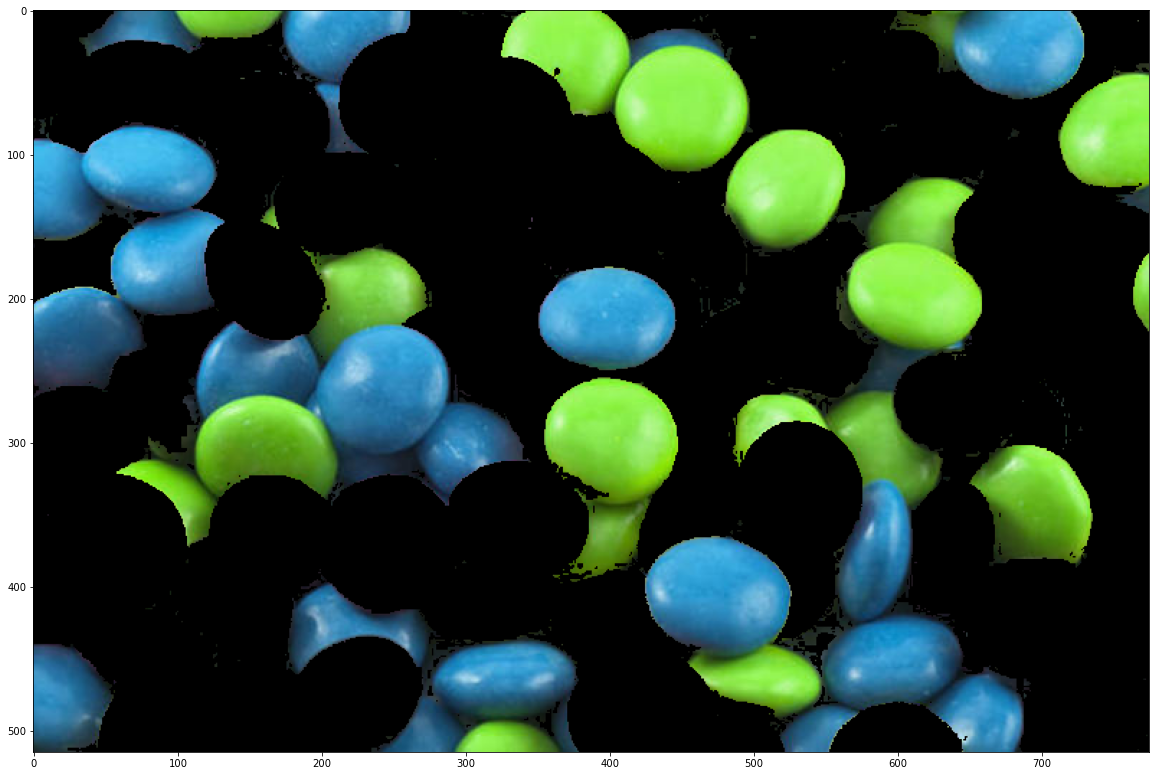

In [101]:
# Now combine both masks togheter so we can see all greens and blues in the same image!

lower_range = (40, 50, 20)
upper_range = (150, 255, 255)

mask = cv2.inRange(HSV, lower_range, upper_range)

masked_skittles = img.copy()

masked_skittles[mask==0] = [0,0,0]

imshow(masked_skittles)

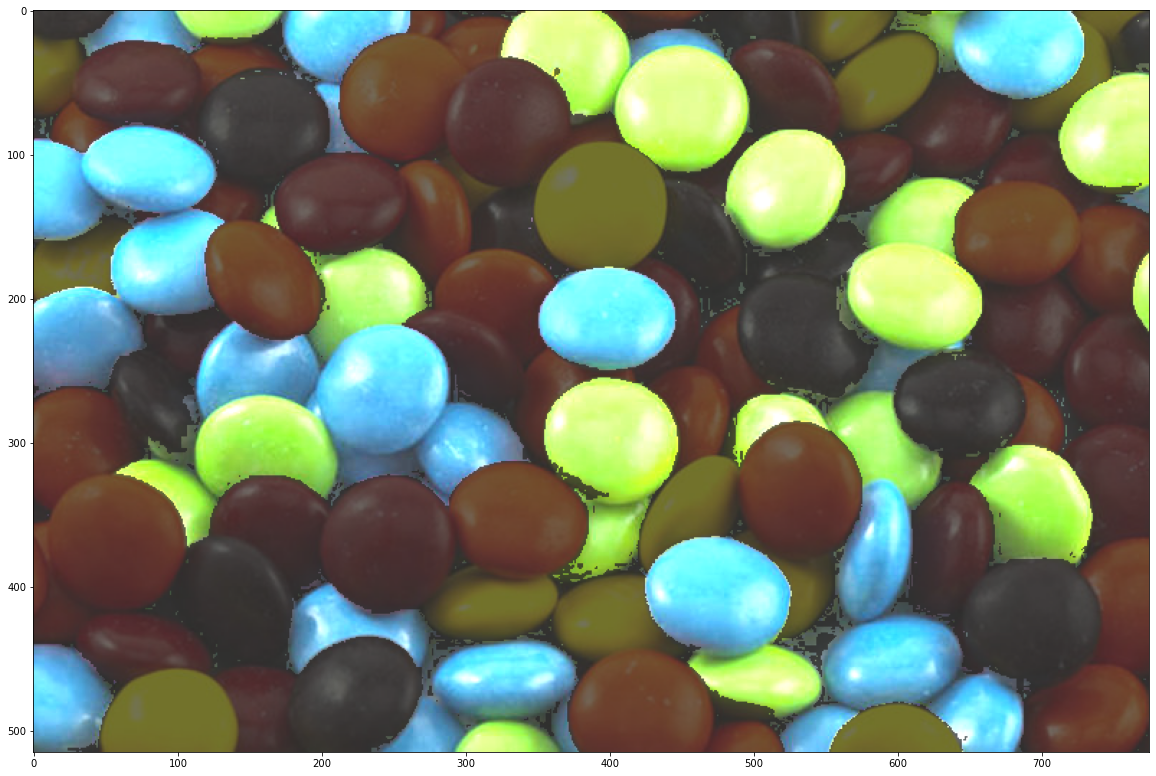

In [102]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image

lower_range = (40, 50, 20)
upper_range = (150, 255, 255)

mask = cv2.inRange(HSV, lower_range, upper_range)

masked_skittles = img.copy()

masked_skittles[mask==0] = [0,0,0]



alpha = cv2.addWeighted(img, 0.3, masked_skittles, 1, 40)

imshow(alpha)

[Hint](# "cv2.addWeighted") 

In [103]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

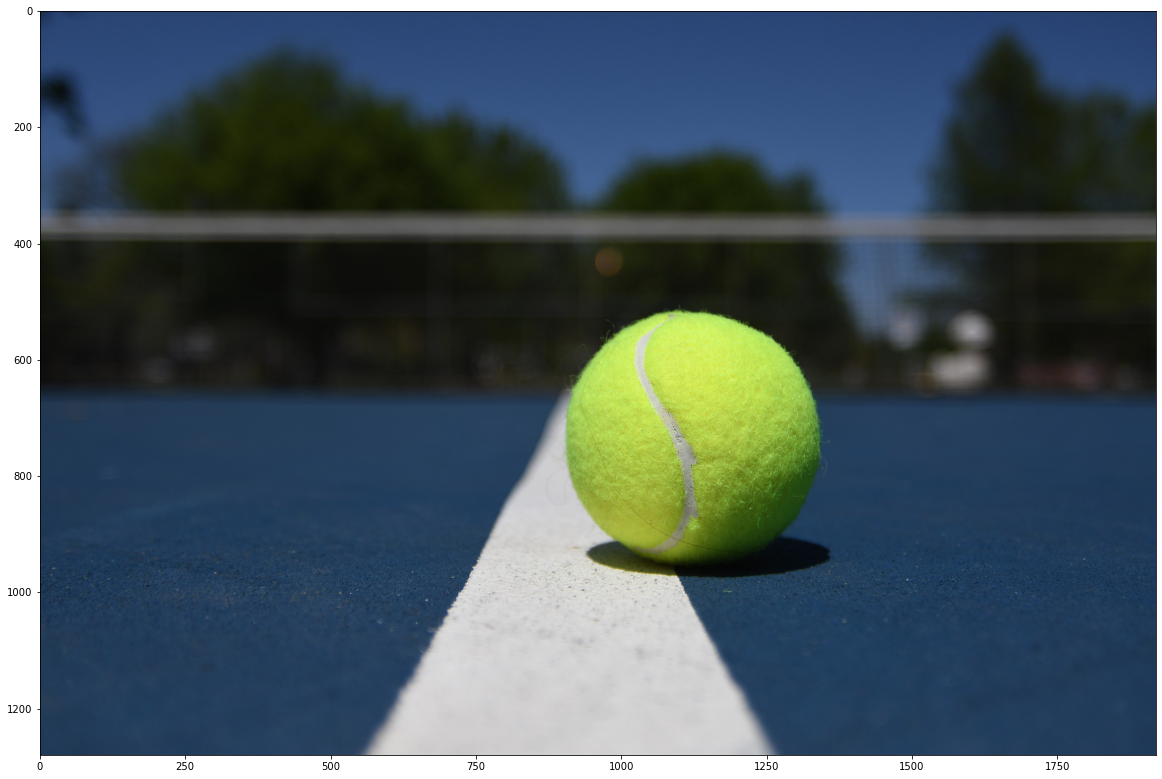

In [108]:
ball = cv2.imread('img/tennis.jpg', 1)
imshow(ball)

In [105]:
HSV = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(HSV)

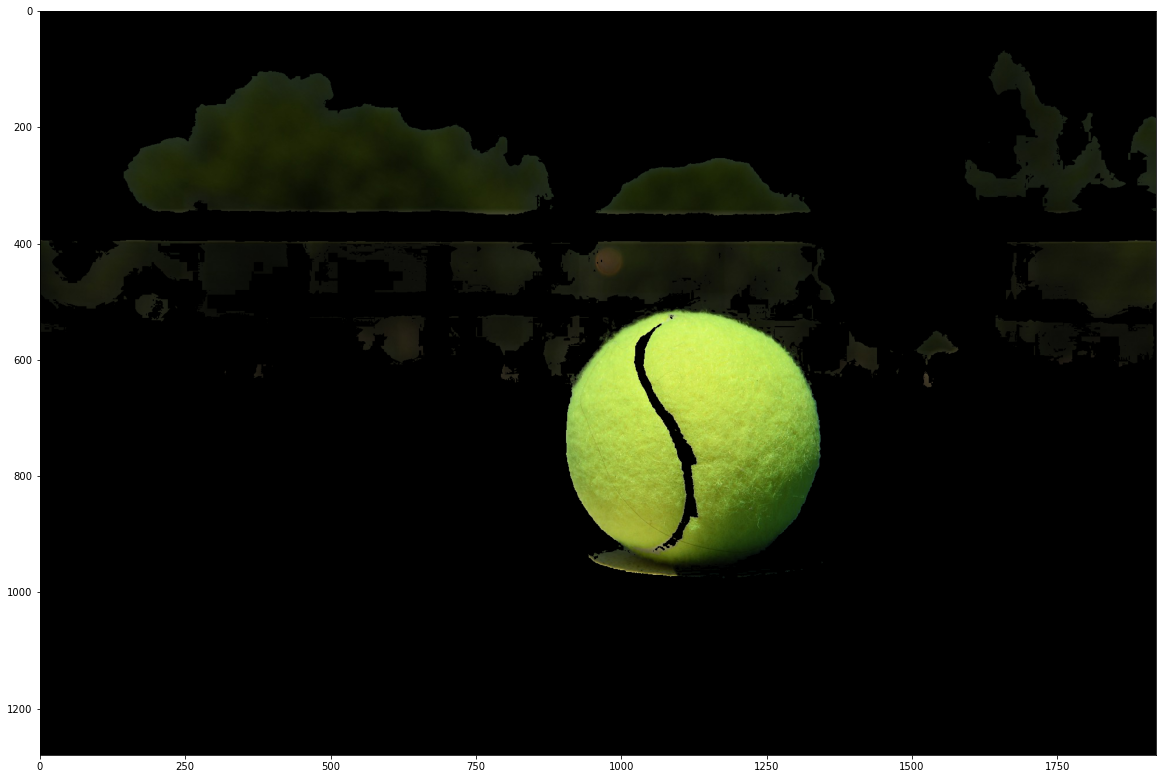

In [106]:
lower_range = (15, 80, 0)
upper_range = (80, 255, 255)

mask = cv2.inRange(HSV, lower_range, upper_range)

m_ball = ball.copy()

m_ball[mask==0] = [0,0,0]

imshow(m_ball)

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?